In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('Bitcoin Historical Data.csv')
df = df.sort_index(ascending=False)
df.tail()


,Date,Price,Open,High,Low,Vol.,Change
4,3/5/2013,40.3,36.2,40.7,36.2,85430,0.12
3,3/4/2013,36.2,34.5,36.7,34.2,46770,0.05
2,3/3/2013,34.5,34.3,34.5,33.8,12530,0.01
1,3/2/2013,34.3,34.5,34.8,33.2,36660,-0.01
0,3/1/2013,34.5,33.4,34.9,32.9,39790,0.03


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
train_dates= pd.to_datetime(df['Date'])

# df.set_index('Date',inplace=True)

In [ ]:
train_data = df[:round(len(df)*80/100)]
test_data = df[round(len(df)*80/100):]

print(train_data)
print(test_data)

           Date    Price     Open     High      Low    Vol.  Change
4018 2024-03-01  62397.7  61157.3  63147.3  60790.9   74960    0.02
4017 2024-02-29  61169.3  62467.1  63653.4  60512.5  119290   -0.02
4016 2024-02-28  62467.6  57048.7  63915.3  56704.9  173640    0.09
4015 2024-02-27  57056.2  54491.1  57555.2  54464.0  100480    0.05
4014 2024-02-26  54495.1  51722.7  54899.1  50925.2   78050    0.05
...         ...      ...      ...      ...      ...     ...     ...
808  2015-05-18    232.6    236.3    237.1    231.5   53140   -0.02
807  2015-05-17    236.3    236.2    237.8    235.4   28430    0.00
806  2015-05-16    236.2    237.2    237.8    234.6   27050    0.00
805  2015-05-15    237.2    236.9    238.8    235.5   46030    0.00
804  2015-05-14    236.9    236.4    239.2    232.4   71020    0.00

[3215 rows x 7 columns]
          Date  Price   Open   High    Low   Vol.  Change
803 2015-05-13  236.4  241.6  243.9  234.1  84430   -0.02
802 2015-05-12  241.6  241.8  243.0  239.2 

In [ ]:
X = df['Date'].apply(lambda x:x.timestamp()).values.reshape(-1,1)
y = df['Price'].values

In [ ]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

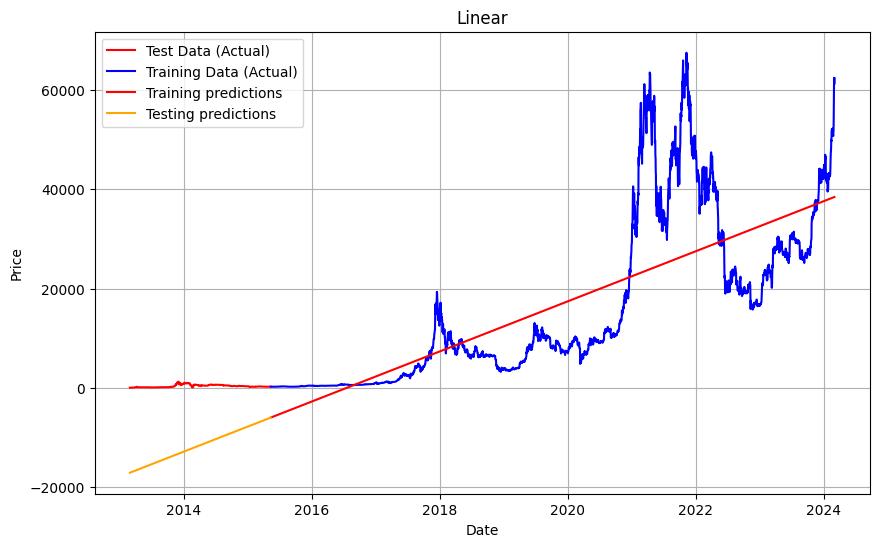

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
plt.figure(figsize=(10,6))
# plt.scatter(X_train, y_train, color='blue', label='Training data')
# plt.scatter(X_test, y_test, color='green', label='Testing data')

plt.plot(test_data['Date'], test_data['Price'], linestyle='-', color='r', label='Test Data (Actual)')
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Training Data (Actual)')
plt.plot(train_data['Date'], y_train_pred, color='red', label='Training predictions')
plt.plot(test_data['Date'], y_test_pred, color='orange', label='Testing predictions')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Linear')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
n_days_for_prediction= 30
cols = list(df)[1:6]
predict_period_dates = pd.date_range(list(train_dates)[-1], periods=n_days_for_prediction).tolist()
print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])
# df_for_training = df[cols].astype(float)

[Timestamp('2013-03-01 00:00:00'), Timestamp('2013-03-02 00:00:00'), Timestamp('2013-03-03 00:00:00'), Timestamp('2013-03-04 00:00:00'), Timestamp('2013-03-05 00:00:00'), Timestamp('2013-03-06 00:00:00'), Timestamp('2013-03-07 00:00:00'), Timestamp('2013-03-08 00:00:00'), Timestamp('2013-03-09 00:00:00'), Timestamp('2013-03-10 00:00:00'), Timestamp('2013-03-11 00:00:00'), Timestamp('2013-03-12 00:00:00'), Timestamp('2013-03-13 00:00:00'), Timestamp('2013-03-14 00:00:00'), Timestamp('2013-03-15 00:00:00'), Timestamp('2013-03-16 00:00:00'), Timestamp('2013-03-17 00:00:00'), Timestamp('2013-03-18 00:00:00'), Timestamp('2013-03-19 00:00:00'), Timestamp('2013-03-20 00:00:00'), Timestamp('2013-03-21 00:00:00'), Timestamp('2013-03-22 00:00:00'), Timestamp('2013-03-23 00:00:00'), Timestamp('2013-03-24 00:00:00'), Timestamp('2013-03-25 00:00:00'), Timestamp('2013-03-26 00:00:00'), Timestamp('2013-03-27 00:00:00'), Timestamp('2013-03-28 00:00:00'), Timestamp('2013-03-29 00:00:00'), Timestamp('20

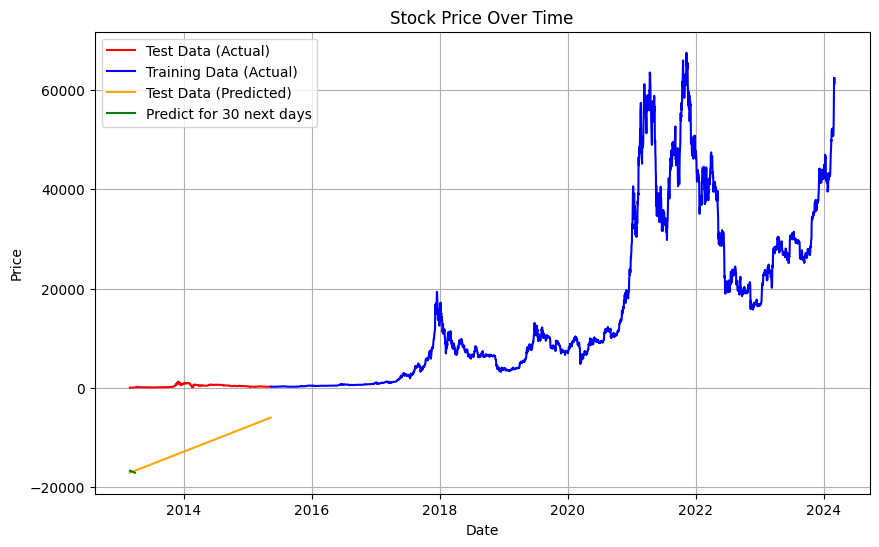

In [ ]:
# Visualize time series of actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], test_data['Price'], linestyle='-', color='r', label='Test Data (Actual)')
plt.plot(train_data['Date'], train_data['Price'], linestyle='-', color='b', label='Training Data (Actual)')
plt.plot(test_data['Date'], y_test_pred, linestyle='-', color='orange', label='Test Data (Predicted)')
plt.plot(predict_period_dates, prediction1, linestyle='-', color='g', label='Predict for 30 next days')

plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()